# Importing the packages

In [2]:
!pip install pycaret
import pandas as pd

In [3]:
data=pd.read_excel('Auto.xlsx')

In [4]:
data.head()

,id,year,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,loan_amount,term,term_cat,application_type,application_type_cat,purpose,purpose_cat,interest_payments,interest_payment_cat,loan_condition,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region,Loss,Actual Return,Expected return
0,1077430,2011,1042013,0.5,RENT,1,Low,30000,1,2500,60 months,2,INDIVIDUAL,1,car,2,High,2,Bad Loan,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster,1374.21,0.00,381.75
1,1072053,2011,1012015,9.0,RENT,1,Low,48000,1,3000,36 months,1,INDIVIDUAL,1,car,2,High,2,Good Loan,0,18.64,E,5,5.35,3938.144334,3000.00,0.00,109.43,ulster,0.00,559.20,559.20
2,1069243,2011,1082012,4.0,RENT,1,Low,50000,1,12000,36 months,1,INDIVIDUAL,1,car,2,High,2,Bad Loan,1,15.96,C,3,20.88,3521.950000,1903.66,578.94,421.65,ulster,7899.11,0.00,1915.20
3,1041756,2011,1122012,0.5,MORTGAGE,3,Low,42000,1,4500,60 months,2,INDIVIDUAL,1,car,2,Low,1,Good Loan,0,10.65,B,2,5.40,4907.800000,4500.00,0.00,97.06,munster,0.00,479.25,479.25
4,1068350,2011,1012015,10.0,MORTGAGE,3,Low,83000,1,3500,36 months,1,INDIVIDUAL,1,car,2,Low,1,Good Loan,0,6.03,A,1,2.31,3834.660850,3500.00,0.00,106.53,cannught,0.00,211.05,211.05


# Removing the unecessary columns



In [5]:
# the id field is uneccesary
# the year is also not necessary
# the final_d is  not necessary

In [6]:
data.drop(['id','year','final_d'],axis=1,inplace=True)

In [7]:
data.drop(['home_ownership','application_type','income_category','application_type','purpose','interest_payments','loan_condition','grade'],axis=1,inplace=True)

In [8]:
#several parameters are from the future like the recoveries total_apyment loss Acutal Return and Expected return

In [9]:
data.drop(['total_pymnt','total_rec_prncp','recoveries','Loss','Actual Return','Expected return '],axis=1,inplace=True)

In [10]:
data.head()

,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term,term_cat,application_type_cat,purpose_cat,interest_payment_cat,loan_condition_cat,interest_rate,grade_cat,dti,installment,region
0,0.5,1,30000,1,2500,60 months,2,1,2,2,1,15.27,3,1.00,59.83,leinster
1,9.0,1,48000,1,3000,36 months,1,1,2,2,0,18.64,5,5.35,109.43,ulster
2,4.0,1,50000,1,12000,36 months,1,1,2,2,1,15.96,3,20.88,421.65,ulster
3,0.5,3,42000,1,4500,60 months,2,1,2,1,0,10.65,2,5.40,97.06,munster
4,10.0,3,83000,1,3500,36 months,1,1,2,1,0,6.03,1,2.31,106.53,cannught


In [11]:
print('min     max')
for i in range(1,4):
  p=data[data['income_cat']==i]
  print(p['annual_inc'].min(),end=" ")
  print(p['annual_inc'].max())

min     max
3000 100000
100124 200000
200004 7000000


In [12]:
# The Ranges are wide

In [13]:
data.drop('income_cat',axis=1,inplace=True)

In [14]:
# The term is in string conerting into int
data['term']=data['term'].apply(lambda x:int(x.split()[0]))

In [15]:
data['interest_payment_cat'].value_counts()

1    5667
2    3196
Name: interest_payment_cat, dtype: int64

# Checking the ranges of rate of interest of the interst_rate category

In [16]:
for i in range(1,3):
  p=data[data['interest_payment_cat']==i]
  print(p['interest_rate'].min(),end=" ")
  print(p['interest_rate'].max())

5.32 13.23
13.24 28.99


# Labelling the regions with labels

In [17]:
p=data['region'].unique()
for i in range(len(p)):
  data.replace(p[i],i+1,inplace=True)

In [18]:
data.head(10)

,emp_length_int,home_ownership_cat,annual_inc,loan_amount,term,term_cat,application_type_cat,purpose_cat,interest_payment_cat,loan_condition_cat,interest_rate,grade_cat,dti,installment,region
0,0.5,1,30000,2500,60,2,1,2,2,1,15.27,3,1.00,59.83,1
1,9.0,1,48000,3000,36,1,1,2,2,0,18.64,5,5.35,109.43,2
2,4.0,1,50000,12000,36,1,1,2,2,1,15.96,3,20.88,421.65,2
3,0.5,3,42000,4500,60,2,1,2,1,0,10.65,2,5.40,97.06,3
4,10.0,3,83000,3500,36,1,1,2,1,0,6.03,1,2.31,106.53,4
5,3.0,1,28000,8000,36,1,1,2,2,0,14.65,3,12.60,275.96,2
6,10.0,3,94800,6000,36,1,1,2,2,0,14.27,3,24.53,205.86,3
7,10.0,2,59000,5500,36,1,1,2,1,0,7.90,1,6.65,172.10,5
8,10.0,3,116400,24000,36,1,1,2,1,1,8.90,1,3.94,762.08,1
9,10.0,3,36000,4125,60,2,1,2,1,0,12.69,2,17.73,93.21,4


In [19]:
data.drop(['interest_rate'],axis=1,inplace=True)

In [20]:
data['loan_condition_cat'].value_counts()

0    8267
1     596
Name: loan_condition_cat, dtype: int64

In [21]:
# Therefore as we can see that the data is not properly distributed in between two classes There we need to resample the data.

In [22]:
target=data['loan_condition_cat']

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
sm = SMOTE(random_state = 2)
y=target.values
X=data[:].values
y=y.reshape(-1, 1)
print(X.shape,y.shape)
X,y=sm.fit_sample(X, y.ravel())
print(X.shape,y.shape)

(8863, 14) (8863, 1)
(16534, 14) (16534,)


In [25]:
# As we can see that the data is resampled

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix

In [27]:
scale=StandardScaler()
x=scale.fit_transform(X)

In [28]:
pca=PCA(n_components=14)

In [29]:
x_pca=pca.fit_transform(x)

In [30]:
cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

In [31]:
cum_exp_var

[0.23738492870348604,
 0.3762653012535413,
 0.4923431300318238,
 0.5795477464941606,
 0.6569063467685435,
 0.733102470810383,
 0.8045478162525934,
 0.8686345506556289,
 0.928591916190074,
 0.9832553997707392,
 0.9992437413227468,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002]

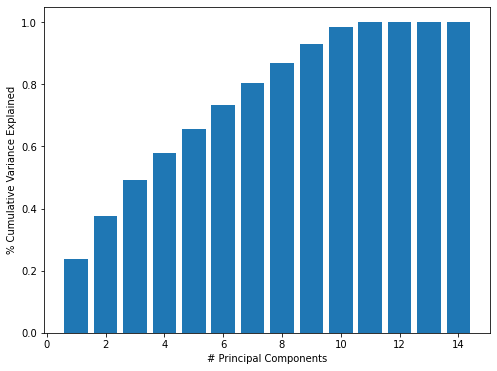

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(1,15), cum_exp_var)
ax.set_xlabel('# Principal Components')
ax.set_ylabel('% Cumulative Variance Explained');

In [41]:
df=pd.DataFrame(X,columns=data.columns)

In [42]:
df['target']=y

In [35]:
import pycaret

In [36]:
from pycaret.classification import *

In [47]:
model_setup=setup(data=df,target='target',session_id=123)

,Description,Value
0,session_id,123
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(16534, 14)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [48]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9622,0.9881,0.9378,0.9858,0.9612,0.9243,0.9254,1.013
xgboost,Extreme Gradient Boosting,0.9608,0.9756,0.9283,0.9928,0.9595,0.9215,0.9235,5.041
lightgbm,Light Gradient Boosting Machine,0.9597,0.9771,0.9235,0.9957,0.9582,0.9195,0.9219,0.255
catboost,CatBoost Classifier,0.9591,0.9775,0.9214,0.9966,0.9575,0.9183,0.9209,10.561
rf,Random Forest Classifier,0.9577,0.9824,0.9237,0.9911,0.9562,0.9153,0.9175,1.438
gbc,Gradient Boosting Classifier,0.9514,0.9741,0.9057,0.9970,0.9491,0.9029,0.9067,1.803
ada,Ada Boost Classifier,0.9325,0.9642,0.8878,0.9753,0.9294,0.8650,0.8686,0.538
dt,Decision Tree Classifier,0.9207,0.9207,0.9297,0.9134,0.9214,0.8414,0.8416,0.064
knn,K Neighbors Classifier,0.7788,0.8490,0.8346,0.7513,0.7907,0.5576,0.5612,0.158
lda,Linear Discriminant Analysis,0.6379,0.6889,0.6165,0.6444,0.6301,0.2758,0.2761,0.041


In [43]:
?

,emp_length_int,home_ownership_cat,annual_inc,loan_amount,term,term_cat,application_type_cat,purpose_cat,interest_payment_cat,loan_condition_cat,grade_cat,dti,installment,region,target
0,0.5,1.0,30000.0,2500.0,60.0,2.0,1.0,2.0,2.0,1.0,3.0,1.00,59.83,1.0,1
1,9.0,1.0,48000.0,3000.0,36.0,1.0,1.0,2.0,2.0,0.0,5.0,5.35,109.43,2.0,0
2,4.0,1.0,50000.0,12000.0,36.0,1.0,1.0,2.0,2.0,1.0,3.0,20.88,421.65,2.0,1
3,0.5,3.0,42000.0,4500.0,60.0,2.0,1.0,2.0,1.0,0.0,2.0,5.40,97.06,3.0,0
4,10.0,3.0,83000.0,3500.0,36.0,1.0,1.0,2.0,1.0,0.0,1.0,2.31,106.53,4.0,0


In [44]:
df.drop('loan_condition_cat',axis=1,inplace=True)

In [46]:
df.head()

,emp_length_int,home_ownership_cat,annual_inc,loan_amount,term,term_cat,application_type_cat,purpose_cat,interest_payment_cat,grade_cat,dti,installment,region,target
0,0.5,1.0,30000.0,2500.0,60.0,2.0,1.0,2.0,2.0,3.0,1.00,59.83,1.0,1
1,9.0,1.0,48000.0,3000.0,36.0,1.0,1.0,2.0,2.0,5.0,5.35,109.43,2.0,0
2,4.0,1.0,50000.0,12000.0,36.0,1.0,1.0,2.0,2.0,3.0,20.88,421.65,2.0,1
3,0.5,3.0,42000.0,4500.0,60.0,2.0,1.0,2.0,1.0,2.0,5.40,97.06,3.0,0
4,10.0,3.0,83000.0,3500.0,36.0,1.0,1.0,2.0,1.0,1.0,2.31,106.53,4.0,0


In [52]:
best_model=create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9585,0.9880,0.9396,0.9767,0.9577,0.9171,0.9178
1,0.9611,0.9867,0.9361,0.9855,0.9601,0.9223,0.9234
2,0.9568,0.9832,0.9310,0.9818,0.9558,0.9137,0.9149
3,0.9594,0.9885,0.9309,0.9872,0.9582,0.9188,0.9203
4,0.9559,0.9865,0.9257,0.9853,0.9546,0.9118,0.9135
5,0.9697,0.9909,0.9516,0.9875,0.9692,0.9395,0.9401
6,0.9723,0.9923,0.9499,0.9946,0.9717,0.9447,0.9456
7,0.9654,0.9879,0.9396,0.9909,0.9645,0.9309,0.9321
8,0.9594,0.9871,0.9361,0.9819,0.9584,0.9188,0.9198
9,0.9628,0.9899,0.9378,0.9873,0.9619,0.9257,0.9268
